
# Обнаружение сколиоза  и спондилолистеза по рентгеновским снимкам позвоночника с визуализацией результатов обучения модели

# **Diplom The vertebrae X-ray Detection: PyTorch на ResNet50**


## **1. PyTorch - фреймворк для глубокого обучения**

PyTorch — это фреймворк для глубокого обучения, разработанный Facebook's AI Research lab (FAIR). Он используется как для исследований, так и для разработки приложений.

**Преимущества PyTorch:**
- **Динамическое построение графов вычислений**: PyTorch использует динамическое построение графов, что упрощает отладку и делает код более интуитивным.
- **Интуитивный синтаксис**: PyTorch имеет синтаксис, схожий с NumPy, что делает его легким для изучения и использования.
- **Активное сообщество и поддержка**: PyTorch имеет большое и активное сообщество, что означает наличие множества ресурсов и библиотек.

**Недостатки PyTorch:**
- **Меньшая экосистема**: Хотя PyTorch быстро развивается, его экосистема может быть менее обширной по сравнению с TensorFlow.
- **Отсутствие встроенной поддержки распределенных вычислений**: PyTorch имеет менее развитую поддержку распределенных вычислений по сравнению с TensorFlow.

PyTorch используется многими исследователями и разработчиками в области искусственного интеллекта. Его простота, гибкость и мощные возможности делают его отличным выбором для тех, кто хочет начать работать с машинным обучением и глубокими нейронными сетями, поэтому в данном уроке мы рассмотрим задачи именно на нём.

#** Использование предобученной модели ResNet50 c PyTorch для классификации рентгеновских снимков позвоночника**

### Описание датасета рентгеновских снимков позвоночника

Датасет содержит рентгеновские снимки позвоночника со сколиозом (scoliosis), без патологии(normal) и со спондилолистезом (spondylolisthesis). Изображения рассортированы по классам и организованы в соответствующие папки. Датасет используется для обучения модели классификации рентгеновских снимков позвоночника.

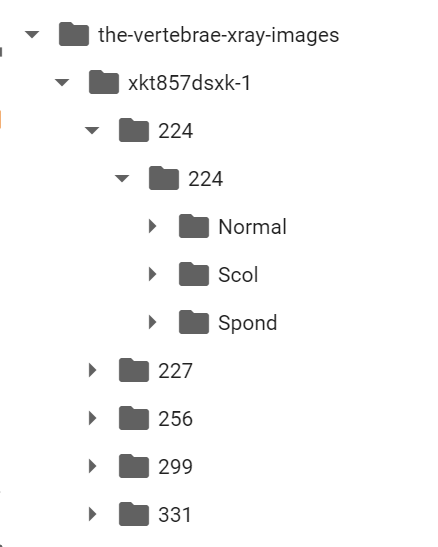

#### Структура датасета с изображениями нужных размеров для нейронной сети   (224 x 224)

- **Normal**
  - Количество изображений: 71
- **Scol**
  - Количество изображений: 188
-  **Spond**
  - Количество изображений: 79
**Общее количество изображений**: 338

В нашем примере мы будем использовать предобученную ResNet18 для классификации рентгеновских снимков позвоночника  для обнаружения сколиоза  и спондилолистеза

Нам нужно придерживаться структуры каталогов для обучения PyTorch:

<pre>
train_dir/  
    class1/  
        img1.jpg  
        img2.jpg  
    class2/  
        img1.jpg  
        img2.jpg
    class3/  
        img1.jpg  
        img2.jpg         
         
test_dir/  
    class1/  
        img1.jpg  
    class2/  
        img1.jpg  
    class3/  
        img1.jpg  
         
</pre>        


### Шаг 1: Настройка окружения

Сначала нам нужно настроить наше окружение в Google Colab и установить необходимые библиотеки.


In [ ]:
# Устанавливаем библиотеки PyTorch и torchvision
!pip install torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

### Шаг 2: Импорт необходимых библиотек

Теперь мы импортируем все необходимые библиотеки для работы с PyTorch и загрузки данных.

In [ ]:
# Импортируем необходимые библиотеки
import torch  # Библиотека для работы с тензорами и обучением моделей в PyTorch
import torch.nn as nn  # Модуль для определения нейронных сетей в PyTorch
import torch.optim as optim  # Модуль для определения оптимизаторов в PyTorch
from torch.utils.data import DataLoader  # Класс для загрузки данных в мини-батчах
from torchvision import datasets, transforms, models  # Модули для работы с датасетами, преобразованиями и предобученными моделями
import matplotlib.pyplot as plt  # Библиотека для визуализации данных и результатов
import numpy as np  # Библиотека для работы с массивами и числовыми операциями
import gdown  # Утилита для загрузки файлов из Google Drive
import os  # Библиотека для работы с операционной системой (например, создание и удаление директорий)
import shutil  # Модуль для работы с файлами и директориями (например, копирование и удаление)
from sklearn.model_selection import train_test_split  # Функция для разделения данных на обучающую и тестовую выборки
from torchvision import transforms  # Модуль для определения преобразований изображений
from PIL import Image  # Библиотека для работы с изображениями

### Шаг 3: Загрузка и предобработка данных датасета рентгена позвоночника



In [ ]:
!pip install kaggle


In [ ]:
# Для доступа к датасету необходимо загрузить личный API на kaggle, который в файле 'kaggle.json'
import gdown

# Ссылка на файл kaggle.json в Google Drive
url = 'https://drive.google.com/uc?id=1j_ybfyQnXPdiYUQF71IwubisuB_zrJI3'
output = 'kaggle.json'
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1j_ybfyQnXPdiYUQF71IwubisuB_zrJI3
To: /content/kaggle.json
100%|██████████| 70.0/70.0 [00:00<00:00, 216kB/s]


'kaggle.json'

In [ ]:
!mkdir -p ~/.kaggle
'''
  Эта команда создает директорию .kaggle в домашней папке пользователя.
  Флаг -p позволяет создать все родительские директории, если они еще не существуют, без вывода ошибок.
'''
!cp kaggle.json ~/.kaggle/
'''
  Эта команда копирует файл kaggle.json в только что созданную директорию .kaggle.
  Файл kaggle.json содержит ваши учетные данные для доступа к API Kaggle, такие как ваш API-ключ.
'''
!chmod 600 ~/.kaggle/kaggle.json
'''
  Эта команда изменяет права доступа к файлу kaggle.json, устанавливая их так, что только владелец файла может читать и записывать в него.
  Это важно для безопасности, чтобы предотвратить несанкционированный доступ к вашим учетным данным.
'''


'\n  Эта команда изменяет права доступа к файлу kaggle.json, устанавливая их так, что только владелец файла может читать и записывать в него.\n  Это важно для безопасности, чтобы предотвратить несанкционированный доступ к вашим учетным данным.\n'

In [ ]:
!kaggle datasets download -d yasserhessein/the-vertebrae-xray-images


Dataset URL: https://www.kaggle.com/datasets/yasserhessein/the-vertebrae-xray-images
License(s): CC-BY-SA-4.0
 89% 73.0M/81.8M [00:00<00:00, 97.9MB/s]
100% 81.8M/81.8M [00:00<00:00, 99.4MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile('the-vertebrae-xray-images.zip', 'r') as zip_ref:
    zip_ref.extractall('the-vertebrae-xray-images')


In [ ]:
import os
import shutil

# Создаем папки для структуры по 3 классам
os.makedirs('/content/NORMAL', exist_ok=True)
os.makedirs('/content/SCOLIOSIS', exist_ok=True)
os.makedirs('/content/SPONDYLOLISTHESIS', exist_ok=True)

# Пути к исходным папкам
normal_dir = '/content/the-vertebrae-xray-images/xkt857dsxk-1/224/224/Normal'
scol_dir = '/content/the-vertebrae-xray-images/xkt857dsxk-1/224/224/Scol'
spondylo_dir = '/content/the-vertebrae-xray-images/xkt857dsxk-1/224/224/Spond'

# Путь к целевой папке
target_dir_normal = '/content/NORMAL'
target_dir_scoliosis = '/content/SCOLIOSIS'
target_dir_spondylolisthesis = '/content/SPONDYLOLISTHESIS'

# Функция для копирования файлов
def copy_files(src_dir, dst_dir):
    for filename in os.listdir(src_dir):
        src_file = os.path.join(src_dir, filename)
        dst_file = os.path.join(dst_dir, filename)
        if os.path.isfile(src_file):
            shutil.copy(src_file, dst_file)

# Копируем файлы  нужного размера (224 x 224) из Normal, Scol и Spond в NORMAL, SCOLIOSIS и SPONDYLOLISTHESIS
copy_files(normal_dir, target_dir_normal)
copy_files(scol_dir, target_dir_scoliosis)
copy_files(spondylo_dir, target_dir_spondylolisthesis)

print("Файлы успешно скопированы в папки")

Файлы успешно скопированы в папки


In [ ]:
folder_path = '/content/NORMAL'
file_count = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])

print(f"Количество файлов в папке: {file_count}")

Количество файлов в папке: 71


In [ ]:
folder_path = '/content/SCOLIOSIS'
file_count = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])

print(f"Количество файлов в папке: {file_count}")

Количество файлов в папке: 188


In [ ]:
folder_path = '/content/SPONDYLOLISTHESIS'
file_count = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])

print(f"Количество файлов в папке: {file_count}")

Количество файлов в папке: 79


In [ ]:
#@title Функция разделения датасета на тренировочную и тестовую выборки

# Функция для разделения данных на тренировочные и тестовые наборы
def split_dataset(data_dir, train_dir, test_dir, test_size=0.2):
    # Проверяем, что папки для разделения существуют, и создаем их, если они отсутствуют
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    classes = os.listdir(data_dir)
    for cls in classes:
        class_dir = os.path.join(data_dir, cls)
        if os.path.isdir(class_dir):
            files = os.listdir(class_dir)
            if len(files) == 0:
                print(f"Категория {cls} пуста, пропускаем.")
                continue
            train_files, test_files = train_test_split(files, test_size=test_size, random_state=42)

            # Создаем папки для каждой категории в тренировочном и тестовом наборах
            train_class_dir = os.path.join(train_dir, cls)
            test_class_dir = os.path.join(test_dir, cls)
            if not os.path.exists(train_class_dir):
                os.makedirs(train_class_dir)
            if not os.path.exists(test_class_dir):
                os.makedirs(test_class_dir)

            # Копируем файлы в соответствующие папки
            for file in train_files:
                shutil.move(os.path.join(class_dir, file), os.path.join(train_class_dir, file))
            for file in test_files:
                shutil.move(os.path.join(class_dir, file), os.path.join(test_class_dir, file))

In [ ]:
!pip install albumentations

In [ ]:
#@title *** новый вариант функции def split_dataset() c аугментацией данных и балансировкой изображений в классах

import os
import shutil
import random
import cv2
import numpy as np
import albumentations as A

# Пути к папкам для тренировочных и тестовых данных
train_dir = '/content/train'
test_dir = '/content/test'
extract_to = '/content'

# Определяем метки классов
classes = ['NORMAL', 'SCOLIOSIS', 'SPONDYLOLISTHESIS']
# Определяем предустановленные количества примеров в каждом классе
class_counts = {
    'NORMAL': 71,
    'SCOLIOSIS': 188,
    'SPONDYLOLISTHESIS': 79,
}

# Стремимся поддерживать максимальное количество для SCOLIOSIS
target_count = max(class_counts.values())

# Создаем необходимые директории для классов
for cls in classes:
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

# Функция для аугментации изображений
def augment_image(image):
    transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.Rotate(limit=40, p=0.5),
        A.RandomBrightnessContrast(p=0.5),
        A.Resize(224, 224)  # Изменяем размер для удобства
    ])
    augmented = transform(image=image)
    return augmented['image']

# Функция для разделения данных на тренировочные и тестовые наборы с аугментацией
def split_dataset(extract_to, train_dir, test_dir, test_size=0.2, augment_count=2):
    for cls in classes:
        src_dir = os.path.join(extract_to, cls)
        files = os.listdir(src_dir)
        random.shuffle(files)  # Перемешиваем файлы

        # Определяем количество тестовых данных
        test_count = int(len(files) * test_size)

        # Копируем файлы в тренировочные и тестовые директории
        for filename in files[test_count:]:
            # Копируем оригинальное изображение
            shutil.copy(os.path.join(src_dir, filename), os.path.join(train_dir, cls, filename))

            # Аугментация изображений
            image = cv2.imread(os.path.join(src_dir, filename))
            for i in range(augment_count):
                augmented_image = augment_image(image)
                aug_filename = f"{os.path.splitext(filename)[0]}_aug_{i}.jpg"
                cv2.imwrite(os.path.join(train_dir, cls, aug_filename), augmented_image)

        for filename in files[:test_count]:
            shutil.copy(os.path.join(src_dir, filename), os.path.join(test_dir, cls, filename))

        # Балансировка классов
        current_count = len(os.listdir(os.path.join(train_dir, cls)))
        if current_count < target_count:
            additional_images_needed = target_count - current_count
            for _ in range(additional_images_needed):
                # Случайно берем одно из существующих изображений для аугментации
                filename = random.choice(files[test_count:])  # Используем только тренировочные данные
                image = cv2.imread(os.path.join(src_dir, filename))
                augmented_image = augment_image(image)
                aug_filename = f"{os.path.splitext(filename)[0]}_bal_aug.jpg"
                cv2.imwrite(os.path.join(train_dir, cls, aug_filename), augmented_image)

# Вызов функции для разделения данных на тренировочные и тестовые наборы
split_dataset(extract_to, train_dir, test_dir)

# Проверяем содержимое папок после разделения
print("Содержимое папки train:", {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in classes})
print("Содержимое папки test:", {cls: len(os.listdir(os.path.join(test_dir, cls))) for cls in classes})

Содержимое папки train: {'NORMAL': 186, 'SCOLIOSIS': 453, 'SPONDYLOLISTHESIS': 192}
Содержимое папки test: {'NORMAL': 14, 'SCOLIOSIS': 37, 'SPONDYLOLISTHESIS': 15}


In [ ]:
folder_path = '/content/train/NORMAL'
file_count = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])

print(f"Количество файлов в папке после аугментации: {file_count}")

Количество файлов в папке после аугментации: 186


In [ ]:
folder_path = '/content/train/SCOLIOSIS'
file_count = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])

print(f"Количество файлов в папке после аугментации: {file_count}")

Количество файлов в папке после аугментации: 453


In [ ]:
folder_path = '/content/train/SPONDYLOLISTHESIS'
file_count = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])

print(f"Количество файлов в папке после аугментации: {file_count}")

Количество файлов в папке после аугментации: 192


**Функция augment_image:**

использует albumentations для выполнения нескольких типов аугментаций, таких как горизонтальный флип, вращение и изменение яркости/контрастности.
Аугментация в split_dataset: при копировании изображений в тренировочную папку оригинал дублируется, а также создаются новые аугментированные версии изображений.
Это позволит вам увеличить объем тренировочных данных и улучшить качество модели.

Горизонтальный флип — это тип аугментации данных, который заключается в отражении изображения по горизонтали. Это означает, что левый край изображения становится правым, а правый край — левым.
Эта техника часто используется в задачах компьютерного зрения, чтобы увеличить разнообразие данных для обучения моделей. Например, если у вас есть изображение человека, отображение его в зеркальном виде помогает модели лучше обрабатывать различные ракурсы и ориентации объектов.

In [ ]:
# @title Создаем загрузчики данных для тренировочного и тестового наборов данных
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Определяем трансформации для предобработки данных
transform = transforms.Compose([
    # transforms.Resize((224, 224)),  # Изменяем размер изображений до 224x224 пикселей
    transforms.ToTensor(),  # Преобразуем изображения в тензоры
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Нормализуем данные (средние и стандартные отклонения для ImageNet)
])

# Загружаем тренировочный и тестовый наборы данных
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)  # Тренировочный набор данных с применением трансформаций
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)  # Тестовый набор данных с применением трансформаций

# Создаем загрузчики данных
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # Загрузчик для тренировочного набора данных с размером батча 32 и перемешиванием
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)  # Загрузчик для тестового набора данных с размером батча 32 без перемешивания

# Выводим информацию о размерах наборов данных
print(f'Размер тренировочного набора: {len(train_dataset)} изображений')  # Вывод размера тренировочного набора данных
print(f'Размер тестового набора: {len(test_dataset)} изображений')  # Вывод размера тестового набора данных



Размер тренировочного набора: 831 изображений
Размер тестового набора: 66 изображений


### Шаг4: Использование предобученной модели

Мы будем использовать предобученную модель `ResNet50` и настроим ее для нашей задачи классификации.Удаляем верхний слой сети и заменяем на новый,чтобы обучить на нашем датасете.



In [ ]:
# Загружаем предобученную модель ResNet50
model = models.resnet50(pretrained=True)  # Загружаем модель ResNet50, предобученную на ImageNet

# Заменяем последний слой для классификации на 3 класса (NORMAL, SCOLIOSIS, SPOND...)
num_features = model.fc.in_features  # Получаем количество входных признаков последнего слоя
model.fc = nn.Linear(num_features, 3)  # Заменяем последний слой на линейный слой с 3 выходами (для 3 классов)

# Перемещаем модель на устройство (GPU, если доступно)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Определяем устройство для вычислений (GPU или CPU)
model = model.to(device)  # Перемещаем модель на выбранное устройство

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 109MB/s]


### Шаг 5: Инициализация функции потерь и оптимизатора

Мы определим функцию потерь и выберем оптимизатор для обучения нашей модели.

In [ ]:
# Определяем функцию потерь и оптимизатор
criterion = nn.CrossEntropyLoss()  # Используем функцию потерь CrossEntropyLoss для задачи классификации
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)  # Используем оптимизатор Adam с начальными параметрами последнего слоя модели и скоростью обучения 0.001

### Шаг 6: Обучение модели

Теперь мы обучим нашу нейронную сеть на тренировочном наборе данных.

In [ ]:
import matplotlib.pyplot as plt

def train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=25):
    train_losses = []
    val_losses = []
    train_acc = []
    val_acc = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader.dataset)
        train_accuracy = 100 * correct / total
        train_losses.append(train_loss)
        train_acc.append(train_accuracy)

        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader.dataset)
        val_accuracy = 100 * val_correct / val_total
        val_losses.append(val_loss)
        val_acc.append(val_accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%')

    # Визуализация ошибок и точности
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.show()

    return model

Добавлен параметр val_loader, который передает загрузчик валидационных данных в функцию train_model(). Это необходимо для того, чтобы вычислять ошибку и точность на валидационных данных во время обучения.
Увеличено количество эпох обучения до 30.

Добавлены  в функции списки для сохранения значений ошибок и точности на каждой эпохе для тренировочных и валидационных данных: train_losses, val_losses, train_acc, val_acc.
Во время обучения вычисляется точность на тренировочных данных и сохраняется в train_acc.
Во время валидации вычисляется точность на валидационных данных и сохраняется в val_acc.
В конце функции добавлен код для визуализации ошибок и точности с помощью Matplotlib. Он строит два графика: один для ошибок, другой для точности.
После внесения этих изменений, при вызове train_model() будут не только выводиться значения ошибок и точности на каждой эпохе, но и построены графики для наглядного анализа динамики обучения.

Epoch [1/30], Train Loss: 0.0231, Train Acc: 69.07%, Val Loss: 0.0204, Val Acc: 89.39%
Epoch [2/30], Train Loss: 0.0133, Train Acc: 85.44%, Val Loss: 0.0124, Val Acc: 89.39%
Epoch [3/30], Train Loss: 0.0090, Train Acc: 92.54%, Val Loss: 0.0117, Val Acc: 87.88%
Epoch [4/30], Train Loss: 0.0076, Train Acc: 92.78%, Val Loss: 0.0089, Val Acc: 92.42%
Epoch [5/30], Train Loss: 0.0063, Train Acc: 94.46%, Val Loss: 0.0094, Val Acc: 89.39%
Epoch [6/30], Train Loss: 0.0076, Train Acc: 91.46%, Val Loss: 0.0079, Val Acc: 90.91%
Epoch [7/30], Train Loss: 0.0067, Train Acc: 91.70%, Val Loss: 0.0068, Val Acc: 93.94%
Epoch [8/30], Train Loss: 0.0057, Train Acc: 94.22%, Val Loss: 0.0080, Val Acc: 90.91%
Epoch [9/30], Train Loss: 0.0048, Train Acc: 95.67%, Val Loss: 0.0069, Val Acc: 92.42%
Epoch [10/30], Train Loss: 0.0041, Train Acc: 96.51%, Val Loss: 0.0067, Val Acc: 93.94%
Epoch [11/30], Train Loss: 0.0042, Train Acc: 95.67%, Val Loss: 0.0068, Val Acc: 93.94%
Epoch [12/30], Train Loss: 0.0038, Train 

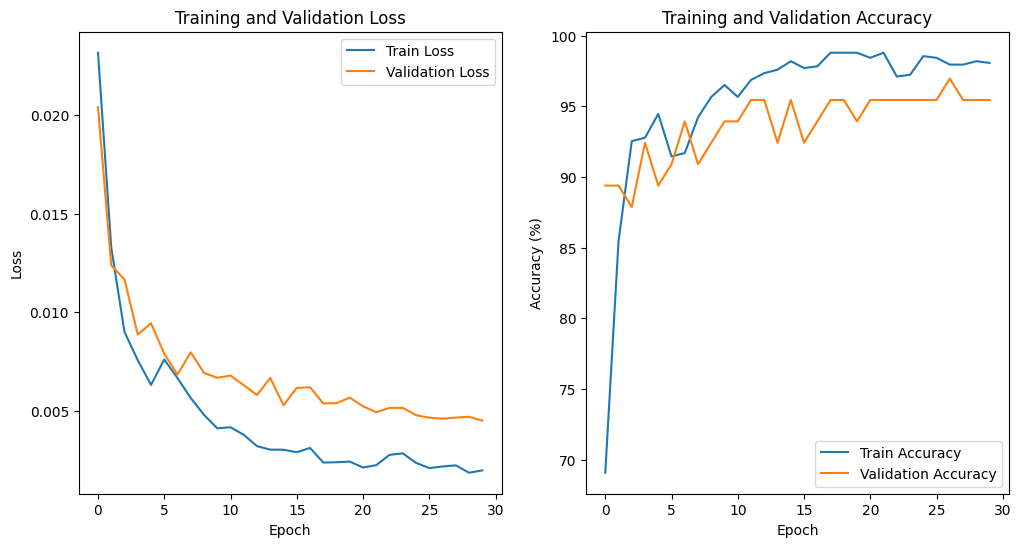

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# Запускаем обучение модели
train_model(
    model,
    train_loader,
    test_loader,
    criterion,
    optimizer,
    device,
    num_epochs=30
)

### Шаг 7: Оценка модели

После обучения мы оценим нашу модель на тестовом наборе данных и визуализируем предсказания.

In [ ]:
#@title Функция для оценки модели
def evaluate_model(model, test_loader, criterion, device):
    model.eval()  # Устанавливаем модель в режим оценки
    test_loss = 0.0
    correct = 0  # Инициализируем переменную для подсчета правильных предсказаний
    total = 0  # Инициализируем переменную для подсчета общего числа образцов
    with torch.no_grad():  # Отключаем вычисление градиентов, так как они не нужны для оценки
        for images, labels in test_loader:  # Проходим по батчам данных из загрузчика тестовых данных
            images, labels = images.to(device), labels.to(device)  # Переносим изображения и метки на устройство (GPU или CPU)
            outputs = model(images)  # Прямой проход: получаем предсказания модели для текущего батча изображений
            loss = criterion(outputs, labels)  # Вычисляем потери
            test_loss += loss.item() * images.size(0)  # Накопление потерь за текущий батч, умножаем на размер батча
            _, predicted = torch.max(outputs.data, 1)  # Получаем предсказания, выбирая класс с максимальной вероятностью
            total += labels.size(0)  # Увеличиваем общее количество образцов
            correct += (predicted == labels).sum().item()  # Увеличиваем количество правильных предсказаний
    accuracy = 100 * correct / total  # Вычисляем точность модели в процентах
    test_loss = test_loss / total  # Вычисляем среднюю потерю на тестовом наборе данных
    print(f'Ошибка: {test_loss:.4f}, Точность: {accuracy:.2f}%')  # Выводим потери и точность модели

In [ ]:
# Оцениваем модель
evaluate_model(
    model,  # Модель, которую мы оцениваем
    test_loader,  # Загрузчик данных для тестового набора
    criterion,  # Функция потерь, используемая для вычисления ошибки
    device  # Устройство, на котором производится вычисление (GPU или CPU)
)

Ошибка: 0.1436, Точность: 95.45%


Точность модели: 0.95


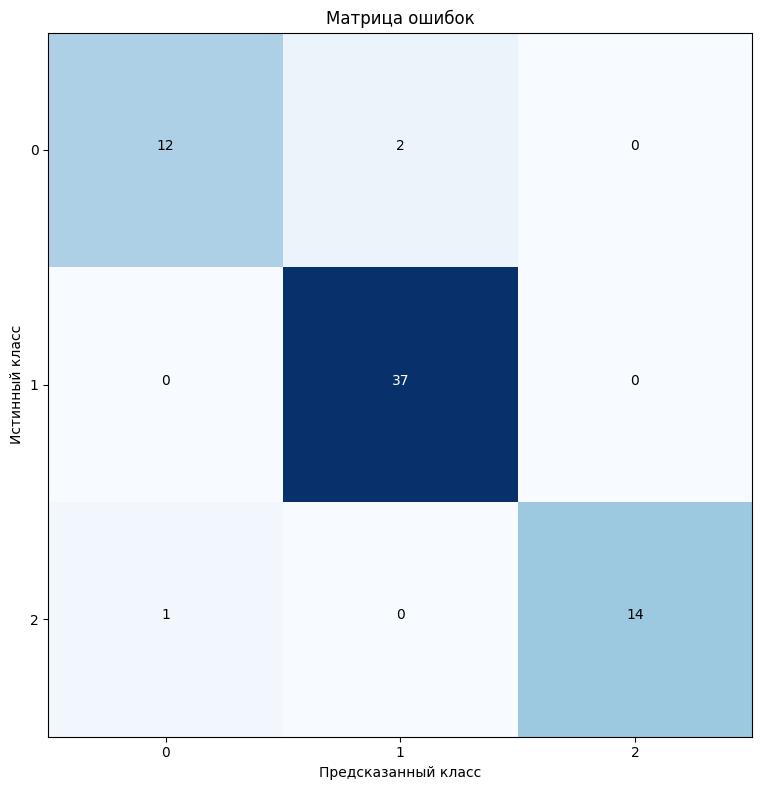

In [ ]:
#@title Оценка c помощью матрицы ошибок
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

def evaluate_model(model, test_loader, device):
    model.eval()  # Переводим модель в режим оценки
    true_labels = []
    pred_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            true_labels.extend(labels.cpu().numpy())
            pred_labels.extend(predicted.cpu().numpy())

    # Вычисляем точность модели
    accuracy = accuracy_score(true_labels, pred_labels)
    print(f'Точность модели: {accuracy:.2f}')

    # Построение матрицы ошибок
    cm = confusion_matrix(true_labels, pred_labels)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title('Матрица ошибок')
    ax.set_xlabel('Предсказанный класс')
    ax.set_ylabel('Истинный класс')
    ax.xaxis.set_ticks_position('bottom')
    tick_marks = np.arange(len(set(true_labels)))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(set(true_labels))
    ax.set_yticklabels(set(true_labels))

    for i in range(len(set(true_labels))):
        for j in range(len(set(true_labels))):
            ax.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > cm.max() / 2. else 'black')

    plt.tight_layout()
    plt.show()

# Использование функции оценки модели
evaluate_model(model, test_loader, device)

Для построения матрицы ошибок (confusion matrix) была написана функция evaluate_model().

Функция evaluate_model() принимает на вход обученную модель, тестовый загрузчик данных и устройство (device), на котором будут выполняться вычисления.
Внутри функции мы переводим модель в режим оценки (model.eval()), а затем проходим по тестовому набору данных, собирая истинные и предсказанные метки классов.
Вычисляется точность модели с помощью accuracy_score() из библиотеки sklearn.metrics.
Строится матрица ошибок с помощью confusion_matrix() из библиотеки sklearn.metrics.
Матрица ошибок визуализируется с помощью библиотеки matplotlib.

# Анализ матрицы ошибок

Данная матрица ошибок (confusion matrix) показывает результаты классификации модели. Она отображает соотношение между истинными и предсказанными классами.

*Основные наблюдения:*

- Наибольшее количество правильных предсказаний (true positives) находится на главной диагонали матрицы - 12 для класса 0 (NORMAL), 37  для класса 1 (SCOLIOSIS) и 14 для класса 2 (SPONDYLOLISTHESIS).

- Ложноположительные предсказания (false positives) находятся вне главной диагонали - 2 для класса 0 и 0 для класса 1.

- Ложноотрицательные предсказания (false negatives) также находятся вне главной диагонали - 1 для класса 0 и 0 для класса 1.

- Верно отрицательные предсказания (true negatives) находятся на пересечении строк и столбцов, где не совпадают классы - 0 для класса 0 и 14 для класса 1.


**Таким образом, данная матрица ошибок показывает, что модель достаточно хорошо справляется с классификацией, допуская лишь небольшое количество ошибок.**

### Шаг 8: Визуализация предсказаний

Мы визуализируем несколько изображений из тестового набора данных вместе с их предсказанными и реальными метками.


In [ ]:
#@title Функция для визуализации изображений
def visualize_images_from_folder(model, folder_path, class_names, folder_name, num_images=6):
    model.eval()  # Устанавливаем модель в режим оценки

    # Создаем список изображений из папки
    image_paths = [os.path.join(folder_path, fname) for fname in os.listdir(folder_path)
                   if fname.endswith(('.png', '.jpg', '.jpeg'))]  # Получаем пути ко всем изображениям в папке
    if len(image_paths) == 0:  # Проверяем, есть ли изображения в папке
        print(f"No images found in {folder_path}.")
        return

    # Применяем трансформации к изображениям
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Изменяем размер изображения до 224x224 пикселей
        transforms.ToTensor(),  # Преобразуем изображение в тензор
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Нормализуем изображение
    ])

    # Визуализируем изображения
    fig = plt.figure(figsize=(12, 6))  # Создаем фигуру для визуализации
    for i, img_path in enumerate(image_paths[:num_images]):  # Цикл по изображениями (максимум num_images)
        image = Image.open(img_path)  # Открываем изображение

        # Проверка на количество каналов и преобразование в трехканальное изображение
        if image.mode != 'RGB':
            image = image.convert('RGB')

        image_tensor = transform(image).unsqueeze(0).to(device)  # Применяем трансформации и перемещаем на устройство

        with torch.no_grad():  # Отключаем вычисление градиентов
            outputs = model(image_tensor)  # Пропускаем изображение через модель
            _, predicted = torch.max(outputs, 1)  # Получаем предсказанный класс

        image = image.convert('RGB')  # Конвертируем изображение в RGB для корректного отображения
        ax = fig.add_subplot(2, num_images // 2, i + 1, xticks=[], yticks=[])  # Добавляем подграфик
        ax.imshow(image)  # Отображаем изображение
        ax.set_title(f'Pred: {class_names[predicted.item()]},\nTrue: {folder_name}')  # Устанавливаем заголовок с предсказанным и истинным классами

    plt.show()  # Отображаем фигуру

# Список названий классов для датасета по заболеваниям позвоночника
class_names = ['NORMAL', 'SCOLIOSIS','SPONDYLOLISTHESIS']

# Пути к папкам
folders = {
    'NORMAL': '/content/test/NORMAL',  # Путь к папке с изображениями NORMAL
    'SCOLIOSIS': '/content/test/SCOLIOSIS',  # Путь к папке с изображениями SCOLIOSIS
    'SPONDYLOLISTHESIS': '/content/test/SPONDYLOLISTHESIS' # Путь к папке с изображениями SPONDYLOLISTHESIS
}

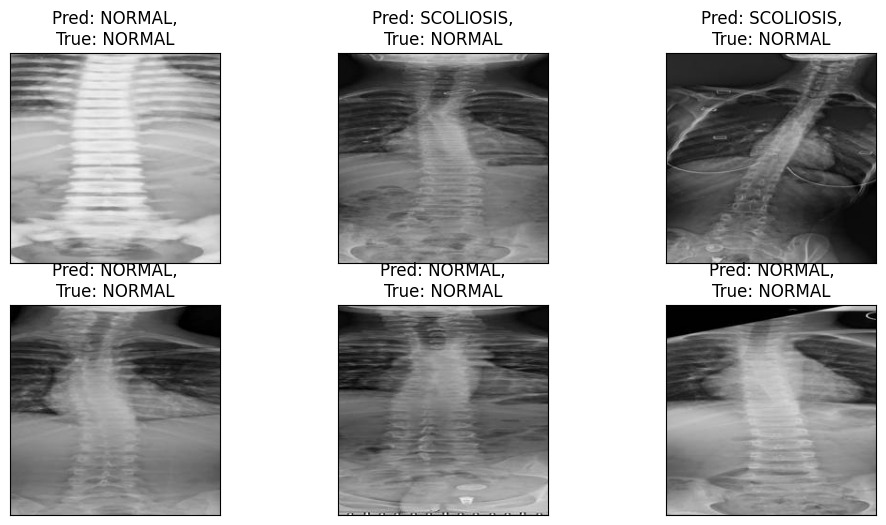

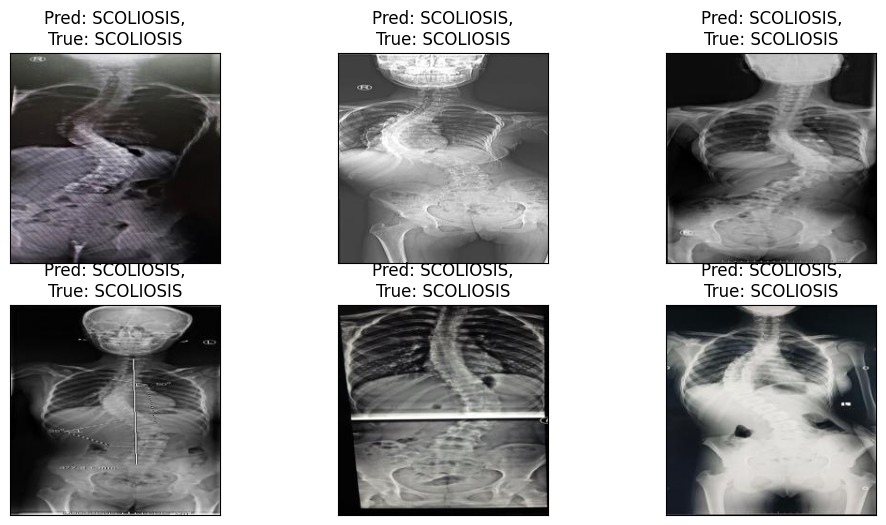

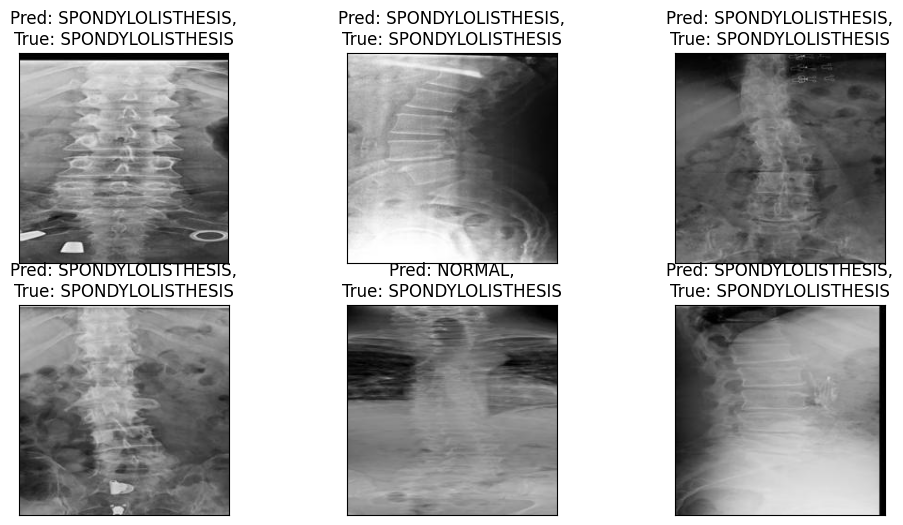

In [ ]:
# Визуализируем изображения из каждой папки
for folder_name, folder_path in folders.items():
    visualize_images_from_folder(
        model,  # Модель, которую мы используем для предсказания
        folder_path,  # Путь к папке с изображениями
        class_names,  # Список названий классов для датасета
        folder_name  # Название текущей папки (класс)
    )

**ВЫВОД:**
Мы успешно применили предобученную модель ResNet50 для классификации рентгеновских снимков  позвоночника в датасете классификации сколиоза и спондилолистеза. В процессе работы мы выполнили все ключевые этапы: от подготовки данных и их загрузки c выполнением аугментации до настройки модели, ее обучения и оценки производительности с визуализацией точности и ошибок. Мы также визуализировали предсказания модели, что позволило наглядно оценить ее результаты. Этот процесс демонстрирует, как можно эффективно использовать предобученные модели в PyTorch, например, ResNet50, для решения задач классификации медицинских изображений.На примере обучения нейронной сети ResNet50 на датасете со снимками заболеваний позвоночника при обучении на 30 эпохах была достигнута: Точность: 95,45%, Ошибка: 0.1060.
Матрица ошибок показывает, что модель достаточно хорошо справляется с классификацией изображений по 3 классам, тем самым позволяет подтвердить установленный диагноз по установленным заболеваниям позвоночника человека.

